In [1]:
# this notebook is for plotting 
# Make a jupyter notebook that uses mdtraj to
# a) read in the ubiquitin structure
# b) print the total number of hydrogen bonds
# c) compute the number of helical amino acids
import numpy as np
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
import os
os.chdir('/home/xz3067/comp-lab-class/comp-lab-class-2023/Week2/Analysis')


In [2]:
# Load your PDB file
#pdb_file = "/home/xz3067/comp-lab-class/comp-lab-class-2023/Week2/Data/1UBQ_processed.pdb"
pdb_file = "/home/xz3067/comp-lab-class/comp-lab-class-2023/Week2/Data/1UBQ.pdb"
traj = md.load(pdb_file)
# Define a function to calculate hydrogen bonds
def calculate_hydrogen_bonds(traj):
    hbonds = md.baker_hubbard(traj, freq=1.0)
    return hbonds

# Calculate hydrogen bonds
hbonds = calculate_hydrogen_bonds(traj)

# Calculate the total number of hydrogen bonds in the trajectory
total_hbonds = sum([len(frame) for frame in hbonds])

# Print the total number of hydrogen bonds
print("Total number of hydrogen bonds:", total_hbonds)
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)
helical_residues = []

for i in range(len(traj)):
    is_helical = True
    for phi, psi in zip(phi_angles[i], psi_angles[i]):
        if not (-60 <= phi <= -40 and -40 <= psi <= -20):
            is_helical = False
            break
    if is_helical:
        helical_residues.append(i)
num_helical_residues = len(helical_residues)
print(f"Number of helical amino acids: {num_helical_residues}")

Total number of hydrogen bonds: 0
Number of helical amino acids: 0


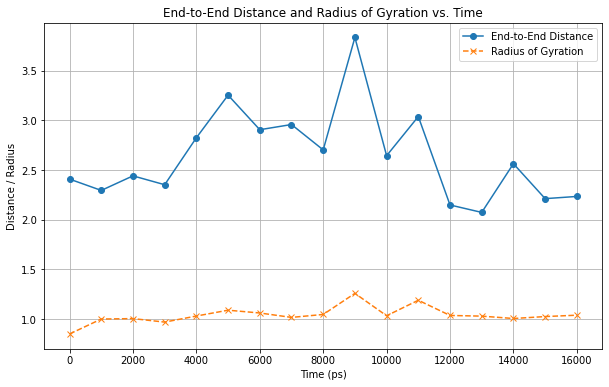

In [3]:
# Make a jupyter notebook that uses mdtraj to 
# a) read in the md trajectory of beta amyloid
# b) compute the end-end distance at each time, and the radius of gyration at each time
# c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
# d) plot a normalized histogram of end-end distance and another of radius of gyration
# top file is ../Data/1hz3_T310.start.nowater.gro
# trajectory file is ../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc
# load the trajectory
traj = md.load_xtc('/home/xz3067/comp-lab-class/comp-lab-class-2023/Week2/Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='/home/xz3067/comp-lab-class/comp-lab-class-2023/Week2/Data/1hz3_T310.start.nowater.gro')

# Calculate the end-to-end distance
end_to_end_distance = md.compute_distances(traj, [[0, traj.n_atoms - 1]])

# Calculate the radius of gyration
radius_of_gyration = md.compute_rg(traj)

time = np.arange(0, traj.n_frames) * traj.timestep

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot end-to-end distance vs. time
plt.plot(time, end_to_end_distance, label='End-to-End Distance', marker='o', linestyle='-')

# Plot radius of gyration vs. time on the same y-axis
plt.plot(time, radius_of_gyration, label='Radius of Gyration', marker='x', linestyle='--')

# Label the axes and add a legend
plt.xlabel('Time (ps)')
plt.ylabel('Distance / Radius')
plt.legend()

# Add a title
plt.title('End-to-End Distance and Radius of Gyration vs. Time')

# Show the plot
plt.grid(True)
plt.show()

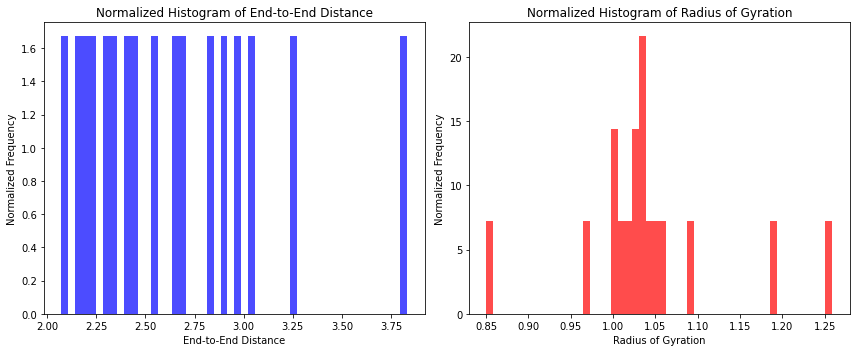

In [4]:
# Calculate the end-to-end distance and radius of gyration for each frame
end_to_end_distance = md.compute_distances(traj, [[0, traj.n_atoms - 1]])[:, 0]
radius_of_gyration = md.compute_rg(traj)

# Create histograms for end-to-end distance and radius of gyration
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(end_to_end_distance, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('End-to-End Distance')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of End-to-End Distance')

plt.subplot(1, 2, 2)
plt.hist(radius_of_gyration, bins=50, density=True, alpha=0.7, color='red')
plt.xlabel('Radius of Gyration')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Radius of Gyration')

plt.tight_layout()
plt.show()